# Benchmarking Results

In [1]:
import numpy as np
import notebook_helper_functions.plot_functions as plot_funcs

### 1. Baseline execute time

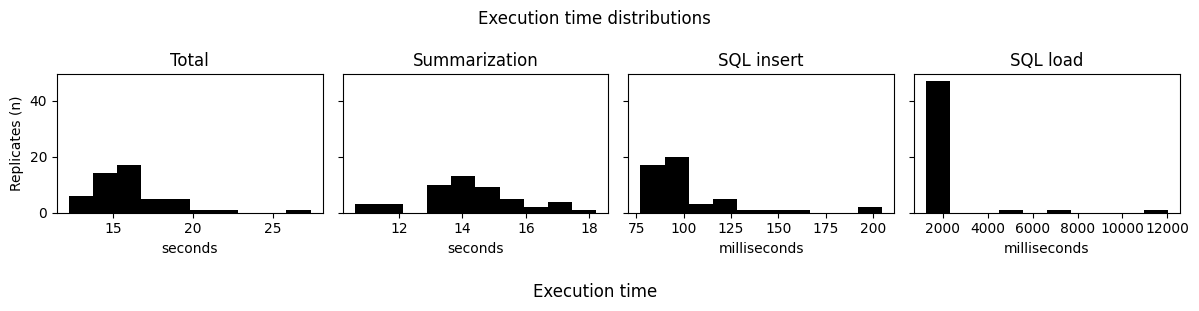

,replicate,num_abstracts,total_replicate_time,total_summarization_time,total_insert_time,total_loading_time,mean_total_time,mean_summarization_time,mean_insert_time,mean_loading_time
0,1,3,82.134315,45.679314,0.400459,36.054543,27.378105,15.226438,0.133486,12.018181
1,2,3,65.980940,42.587274,0.310479,23.083187,21.993647,14.195758,0.103493,7.694396
2,3,3,60.775711,45.028626,0.448737,15.298348,20.258570,15.009542,0.149579,5.099449
3,4,3,56.109214,51.874857,0.253184,3.981172,18.703071,17.291619,0.084395,1.327057
4,5,3,48.584390,44.390237,0.295125,3.899028,16.194797,14.796746,0.098375,1.299676


In [2]:
data, plt = plot_funcs.baseline_execution_plot('../benchmarks/baseline_execute_time/results.csv')

plt.show()
data.head()


**Conclusion**: Not surprisingly, the most time is spent in inference - waiting for the model to summarize the abstract. Focus optimization effort there.

### 2. Huggingface device map

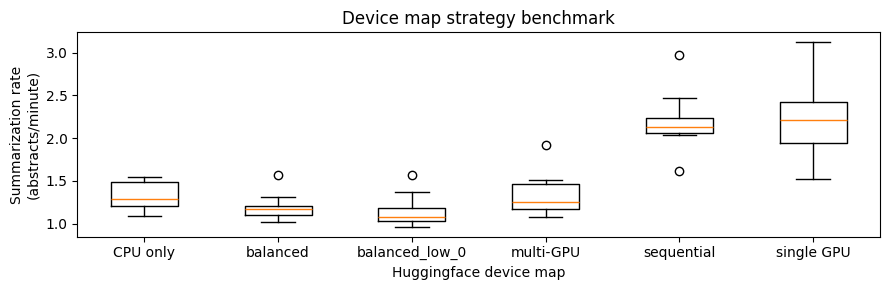

,replicate,abstracts,device map strategy,summarization time (sec.),summarization rate (abstracts/sec.),summarization rate (abstracts/min.)
0,1,3,CPU only,48.627154,0.020565,1.233879
1,2,3,CPU only,44.645400,0.022399,1.343923
2,3,3,CPU only,49.478651,0.020211,1.212644
3,4,3,CPU only,49.861394,0.020056,1.203336
4,5,3,CPU only,39.092824,0.025580,1.534809


In [3]:
data, plt = plot_funcs.device_map_plot('../benchmarks/huggingface_device_map/results.csv')

plt.show()
data.head()

**Conclusion**: Single GPU or sequential is the best device map. Focus on single GPU moving forward so that data parallel inference can be run on multiple GPUs.

### 3. Parallel summarization

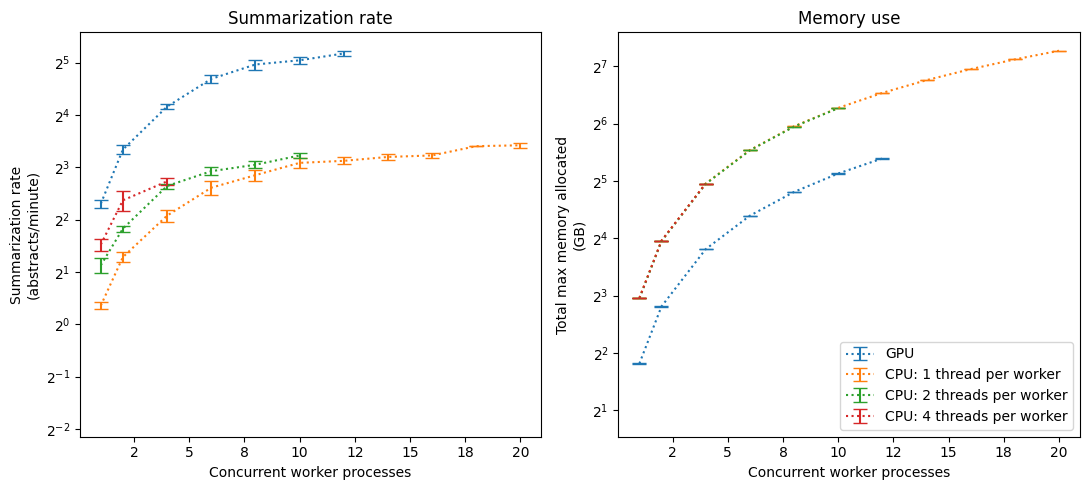

,abstracts,abstracts per worker,replicate,batches,device,workers,summarization time (sec.),summarization rate (abstracts/sec.),max memory allocated (bytes),model memory footprint (bytes),summarization rate (abstracts/min.),max memory allocated (GB),model memory footprint (GB)
0,3,3,1,3,GPU,1,34.627742,0.086636,3516818432,3132600320,5.198144,3.516818,3.1326
1,3,3,2,3,GPU,1,37.260599,0.080514,3506594816,3132600320,4.830840,3.506595,3.1326
2,3,3,3,3,GPU,1,36.094168,0.083116,3503448576,3132600320,4.986955,3.503449,3.1326
3,3,3,4,3,GPU,1,39.574945,0.075806,3520357376,3132600320,4.548332,3.520357,3.1326
4,3,3,5,3,GPU,1,35.101142,0.085467,3507774464,3132600320,5.128038,3.507774,3.1326


In [4]:
data, plt = plot_funcs.parallel_summarization_plot('../benchmarks/parallel_summarization/results.csv')

plt.show()
data.head()

**Conclusion** Not surprisingly, GPU still beats CPU, even though more parallel jobs can run on CPU due to more available system memory.

### 4. Model quantization

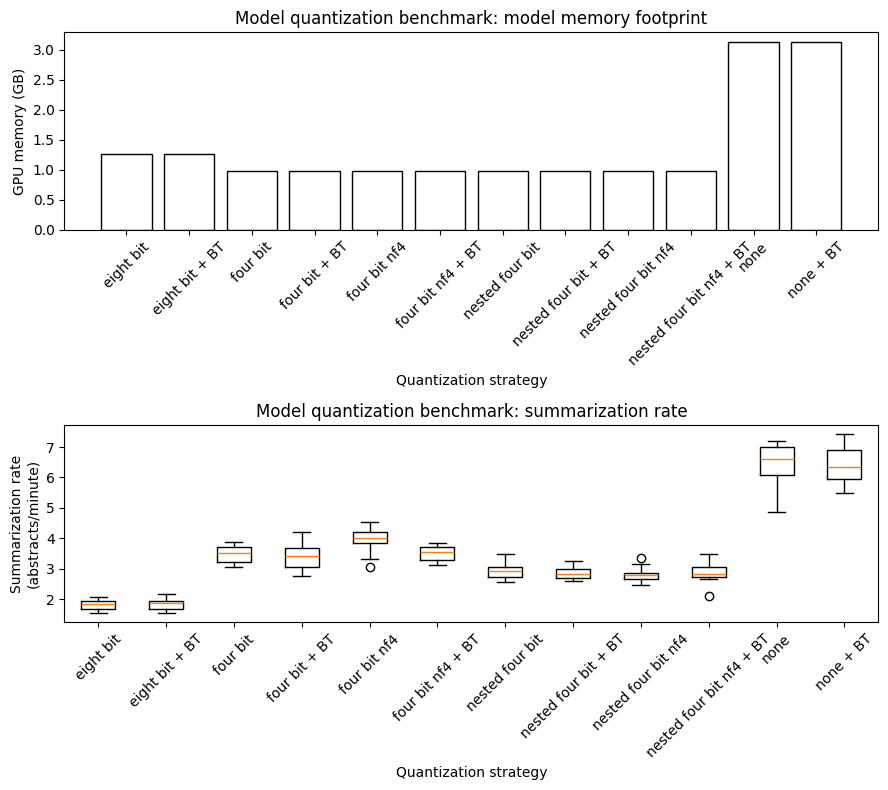

,replicate,abstracts,quantization strategy,summarization time (sec.),summarization rate (abstracts/sec.),model GPU memory footprint (bytes),max memory allocated (bytes),summarization rate (abstracts/min.),model GPU memory footprint (GB)
0,1,5,none,61.830029,0.080867,3132600320,3529794560,4.852011,3.1326
1,2,5,none,42.642623,0.117254,3132600320,3504366080,7.035214,3.1326
2,3,5,none,46.971549,0.106447,3132600320,3521668096,6.386845,3.1326
3,4,5,none,54.685516,0.091432,3132600320,3529925632,5.485913,3.1326
4,5,5,none,50.119571,0.099761,3132600320,3507119104,5.985686,3.1326


In [5]:
data, plt = plot_funcs.model_quantization_plot('../benchmarks/model_quantization/results.csv')

plt.show()
data.head()

**Conclusion**: Quantization can decrease the model's memory footprint by almost 3-fold, but at a significant cost to inference speed.

### 5. Batched summarization

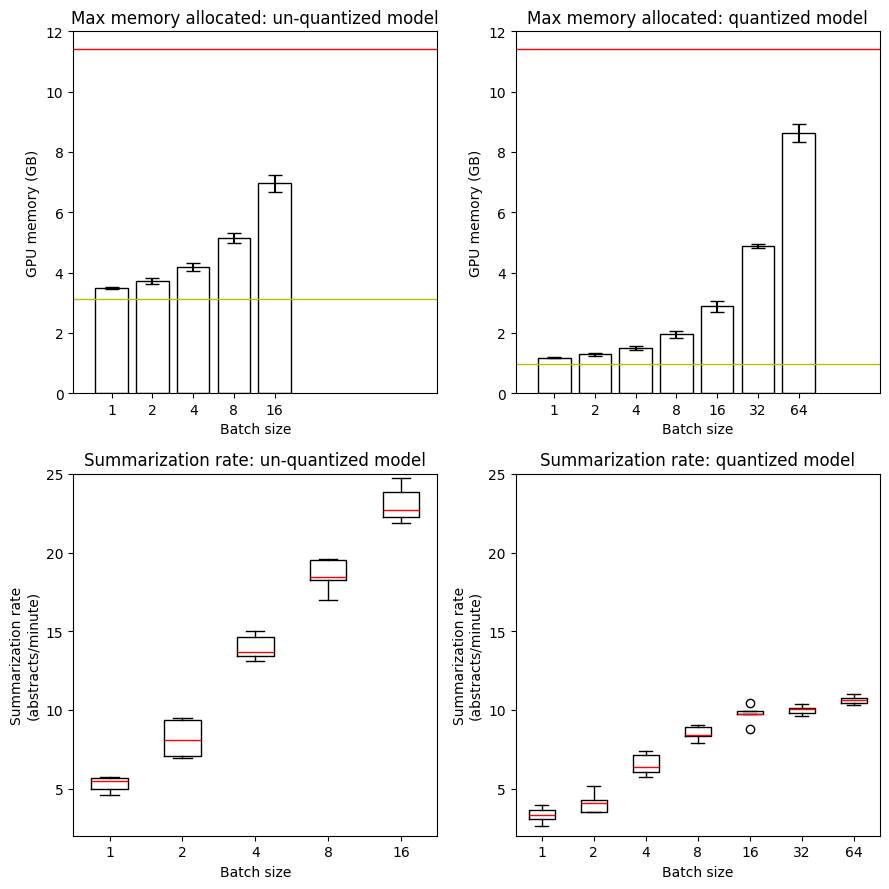

,abstracts,replicate,batches,batch size,quantization,summarization time (sec.),summarization rate (abstracts/sec.),model memory footprint (bytes),max memory allocated (bytes),summarization rate (abstracts/min.),max memory allocated (GB)
0,3,1,3,1,none,31.231767,0.096056,3132600320,3486147072,5.763363,3.486147
1,3,2,3,1,none,36.369606,0.082486,3132600320,3495322112,4.949187,3.495322
2,3,3,3,1,none,32.947045,0.091055,3132600320,3507513344,5.463312,3.507513
3,3,4,3,1,none,31.640228,0.094816,3132600320,3491390976,5.688960,3.491391
4,3,5,3,1,none,39.483424,0.075981,3132600320,3499255296,4.558875,3.499255


In [6]:
data, plt = plot_funcs.batch_summarization_plot(
    datafile='../benchmarks/batched_summarization/results.1.csv',
    unique_condition_columns=[
        'batch size',
        'quantization'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    str_columns=['quantization'], 
    int_columns=[
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)'
    ],
    oom_replacement_val=np.nan
)

plt.show()
data.head()

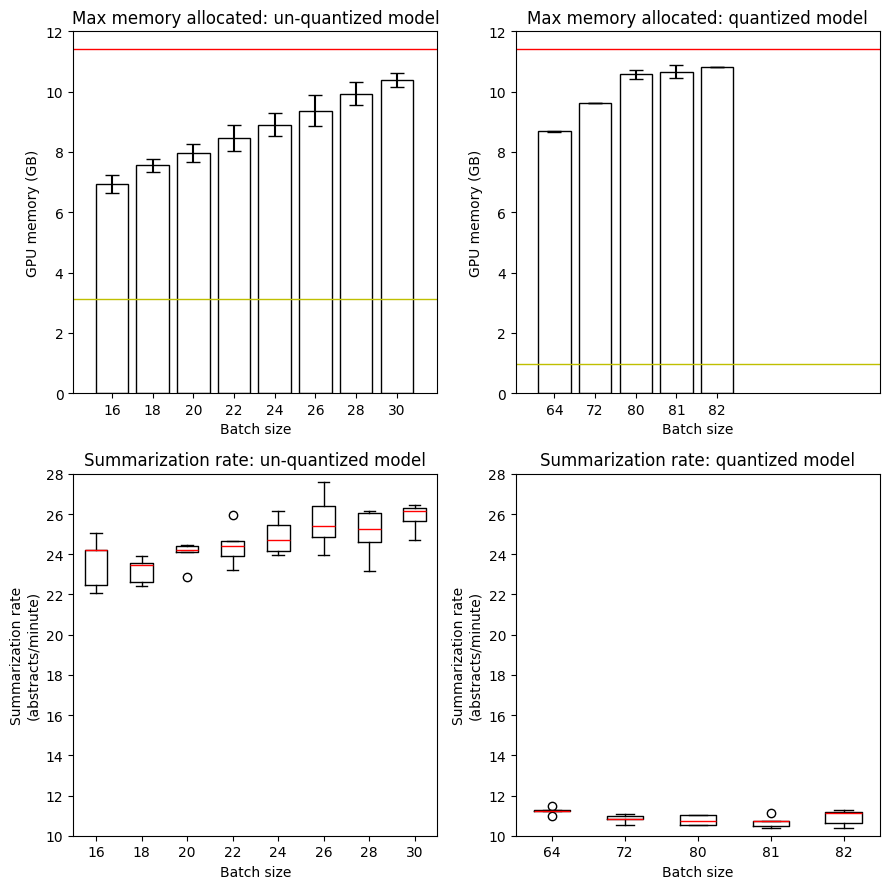

,abstracts,replicate,batches,batch size,quantization,summarization time (sec.),summarization rate (abstracts/sec.),model memory footprint (bytes),max memory allocated (bytes),summarization rate (abstracts/min.),max memory allocated (GB)
0,48,1,3,16,none,128.108073,0.374684,3132600320,6942313472,22.481019,6.942313
1,48,2,3,16,none,118.860944,0.403833,3132600320,6830813696,24.229994,6.830814
2,48,3,3,16,none,118.855940,0.403850,3132600320,6882015744,24.231014,6.882016
3,48,4,3,16,none,130.545901,0.367687,3132600320,7105768448,22.061206,7.105768
4,48,5,3,16,none,114.853584,0.417923,3132600320,6914101248,25.075404,6.914101


In [7]:
data, plt = plot_funcs.batch_summarization_plot(
    datafile='../benchmarks/batched_summarization/results.csv',
    unique_condition_columns=[
        'batch size',
        'quantization'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    str_columns=['quantization'], 
    int_columns=[
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)'
    ],
    oom_replacement_val=np.nan
)

plt.show()
data.head()

**Conclusion**: Quantization allows for larger batch sizes due to the smaller memory footprint of the model, but the resulting speedup is not enough to make up for the lower summarization rate quantization also causes. Don't bother quantizing the model.

### 5. Parallel batched summarization

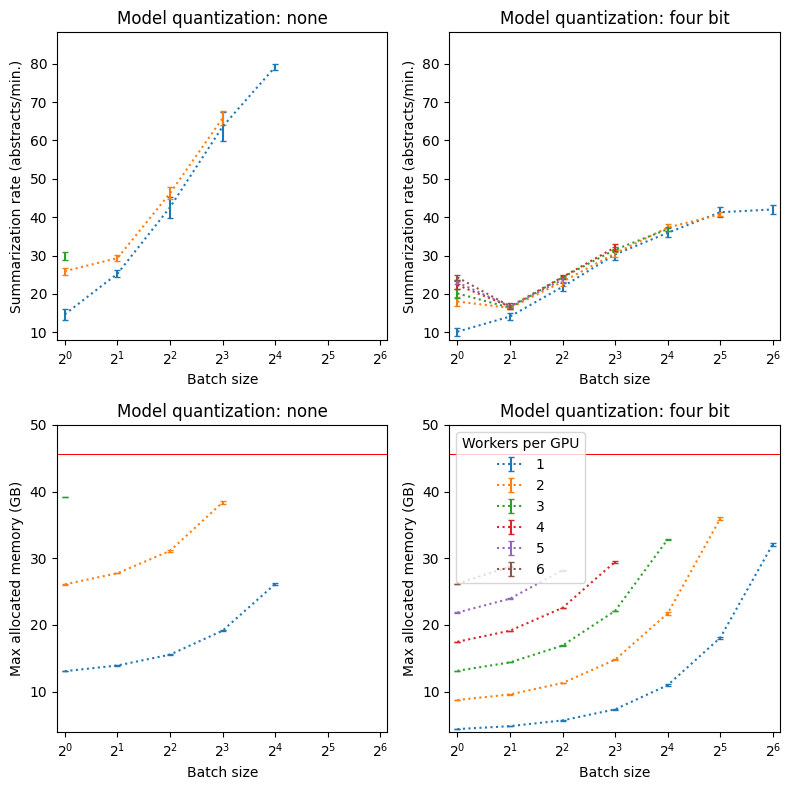

,abstracts,batches,replicate,batch size,workers,workers per GPU,quantization,summarization time (sec.),summarization rate (abstracts/sec.),max memory allocated (bytes),model memory footprint (bytes),summarization rate (abstracts/min.),max memory allocated (GB),model memory footprint (GB),jobs per GPU
0,3,3,1,1,4,1,none,43.645053,0.274945,1.397487e+10,1.253040e+10,16.496715,13.015108,11.669846,1
1,3,3,2,1,4,1,none,49.038482,0.244706,1.398942e+10,1.253040e+10,14.682347,13.028658,11.669846,1
2,3,3,3,1,4,1,none,46.499049,0.258070,1.403739e+10,1.253040e+10,15.484188,13.073337,11.669846,1
3,3,3,4,1,4,1,none,55.170995,0.217506,1.404486e+10,1.253040e+10,13.050336,13.080295,11.669846,1
4,3,3,5,1,4,1,none,52.396182,0.229024,1.401419e+10,1.253040e+10,13.741459,13.051730,11.669846,1


In [8]:
data, plt = plot_funcs.parallel_batched_summarization_plot('../benchmarks/parallel_batched_summarization/results.csv')

plt.show()
data.head()

**Conclusion**: Same as perviously, more quantized models can be run in parallel due to memory savings, but the speed up due to increased parallelism is not enough to compete with the un-quantized model. One worker per GPU with the largest batch size that will fit in memory (16) wins.

### 6. SQL Insert

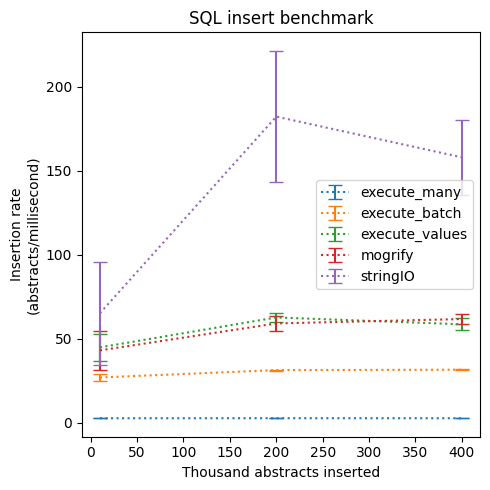

,abstracts,insert time (sec.),insert rate (abstracts/sec.),insert strategy,replicate,insert rate (abstracts/millisecond),thousand abstracts
0,10000,3.724415,2684.985381,execute_many,1,2.684985,10.0
1,10000,3.774634,2649.263727,execute_many,2,2.649264,10.0
2,10000,3.775181,2648.879578,execute_many,3,2.648880,10.0
3,200000,75.498859,2649.046659,execute_many,1,2.649047,200.0
4,200000,75.734771,2640.794947,execute_many,2,2.640795,200.0


In [9]:
data, plt = plot_funcs.sql_insert_plot('../benchmarks/sql_insert/results.csv')

plt.show()
data.head()

**Conclusion**: StringIO with 200,000 abstracts per call wins by a mile. SQL was definitely not the bottleneck here - but, why not speed it up?

### 7. Final result

In [10]:
total_secs = 3580000 * 15
total_mins = total_secs / 60
total_hrs = total_mins / 60
total_unoptimized_days = total_hrs / 24
print(f'Estimated total summarization time, before optimization: {round(total_unoptimized_days, 0)} days.')

total_mins = 3580000 * (1/80)
total_hrs = total_mins / 60
total_optimized_days = total_hrs / 24
print(f'Estimated total summarization time, after optimization: {round(total_optimized_days, 0)} days.')

print(f'\nTotal speed-up: {round(total_unoptimized_days / total_optimized_days, 0)} fold.')

Estimated total summarization time, before optimization: 622.0 days.
Estimated total summarization time, after optimization: 31.0 days.

Total speed-up: 20.0 fold.
